# **Projet n°2: Analysez des données de systèmes éducatifs**

---


##Importer les bibliothèques nécessaires à mon analyse du projet

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#Etape n°1: Découvrir mon Jeu de données
##1°/ Lister mon jeu de données

In [19]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/') # la fonction 'os.' me permet de lister les fichiers dans mon drive

['Copie de Bienvenue dans Colaboratory',
 '.ipynb_checkpoints',
 'EdStatsCountry-Series.csv',
 'EdStatsCountry.csv',
 'EdStatsFootNote.csv',
 'EdStatsData.csv',
 'NomsdespaysvalideparONU.csv',
 'EdStatsSeries.csv',
 'EdStatsData-Copie.csv',
 'natural_earth_vector.sqlite.zip',
 'natural_earth_vector.zip',
 'natural_earth_vector.gpkg.zip',
 'Natural_Earth_quick_start.zip',
 'Projet2.ipynb']

##2°/Convertir mes fichiers .csv et vérifier leurs dimensions

In [20]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsData.csv')
print(df1.shape)
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsSeries.csv')
print(df2.shape)
df3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsFootNote.csv')
print(df3.shape)
df4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry.csv')
print(df4.shape)
df5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsCountry-Series.csv')
print(df5.shape)

(886930, 70)
(3665, 21)
(643638, 5)
(241, 32)
(613, 4)


##3°/ Lister les noms des variables de chaque dataframe

In [21]:
# lister les noms de mes variables/colonnes pour chaque dataframe

print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')
Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concep

#Etape n°2: Première analyse et nettoyage de mon jeu de données

---


## 1°/ Nettoyage des données "Country Name" du dataframe df1
### -Vérification de la colonne "Country Name" du df1 en se basant sur la liste des pays valide du site de l'ONU

In [64]:
df_ONU=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NomsdespaysvalideparONU.csv')# j'ai copié la liste des pays valides du site ONU et j'ai crée ensuite un nouveau dataframe df_ONU
display(df_ONU)

# Maintenant je procède à la vérification des valeurs de la colonne 'Country Name' avec les noms des pays valides de df_ONU
vérif_pays=df1['Country Name'].isin(df_ONU['Pays ONU'])
df1=df1[vérif_pays] #je garde uniquement les lignes de df1 des pays valides par l'ONU
#display(df1)
# Résultat= Je suis passé d'un dataframe initial df1 de 886930 lignes à 601060 lignes

#Suppression des doublons des lignes de df1
df1=df1.drop_duplicates()
#display(df1)
# Résultat: pas de doublons au niveau des lignes de df1

#Suppression des colonnes "Unnamed 69"
#df1=df1.drop('Unnamed: 69',axis=1)
display(df1)

pays_valide_ONU = df1['Country Name'].unique()
display(pays_valide_ONU)

,Pays ONU
0,Afghanistan
1,Date of Admission: 19-11-1946
2,Albania
3,Date of Admission: 14-12-1955
4,Algeria
...,...
427,Z
428,Zambia
429,Date of Admission: 01-12-1964
430,Zimbabwe


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan

###-La liste des pays non valides qui faisait partie de df1 et non inclus dans la liste des pays ONU

In [23]:
df1_copy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EdStatsData-Copie.csv')
vérif_pays=df1_copy['Country Name'].isin(df_ONU['Pays ONU'])
df1_copy_2 = df1_copy[~vérif_pays]
display(df1_copy_2)
country_non_valide=df1_copy_2['Country Name'].value_counts()
display(country_non_valide)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75955,South Asia,SAS,SABER: (Education Management Information Syste...,SABER.EMIS.GOAL1.LVL5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75956,South Asia,SAS,SABER: (Education Management Information Syste...,SABER.EMIS.GOAL1.LVL6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75957,South Asia,SAS,SABER: (Education Management Information Syste...,SABER.EMIS.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75958,South Asia,SAS,SABER: (Education Management Information Syste...,SABER.EMIS.GOAL2.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Arab World                                            3665
Least developed countries: UN classification          3665
OECD members                                          3665
North America                                         3665
Middle income                                         3665
Middle East & North Africa (excluding high income)    3665
Middle East & North Africa                            3665
Lower middle income                                   3665
Low income                                            3665
Low & middle income                                   3665
Latin America & Caribbean (excluding high income)     3665
East Asia & Pacific                                   3665
Latin America & Caribbean                             3665
High income                                           3665
Heavily indebted poor countries (HIPC)                3665
European Union                                        3665
Europe & Central Asia (excluding high income)         36

##2°/ Nettoyage et analyse initiale de mon dataframe df2
### -Un total de 3665 indicateurs classés par topic
### -Visualisation graphique de la distribution des indicateurs par topic (bar chart)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

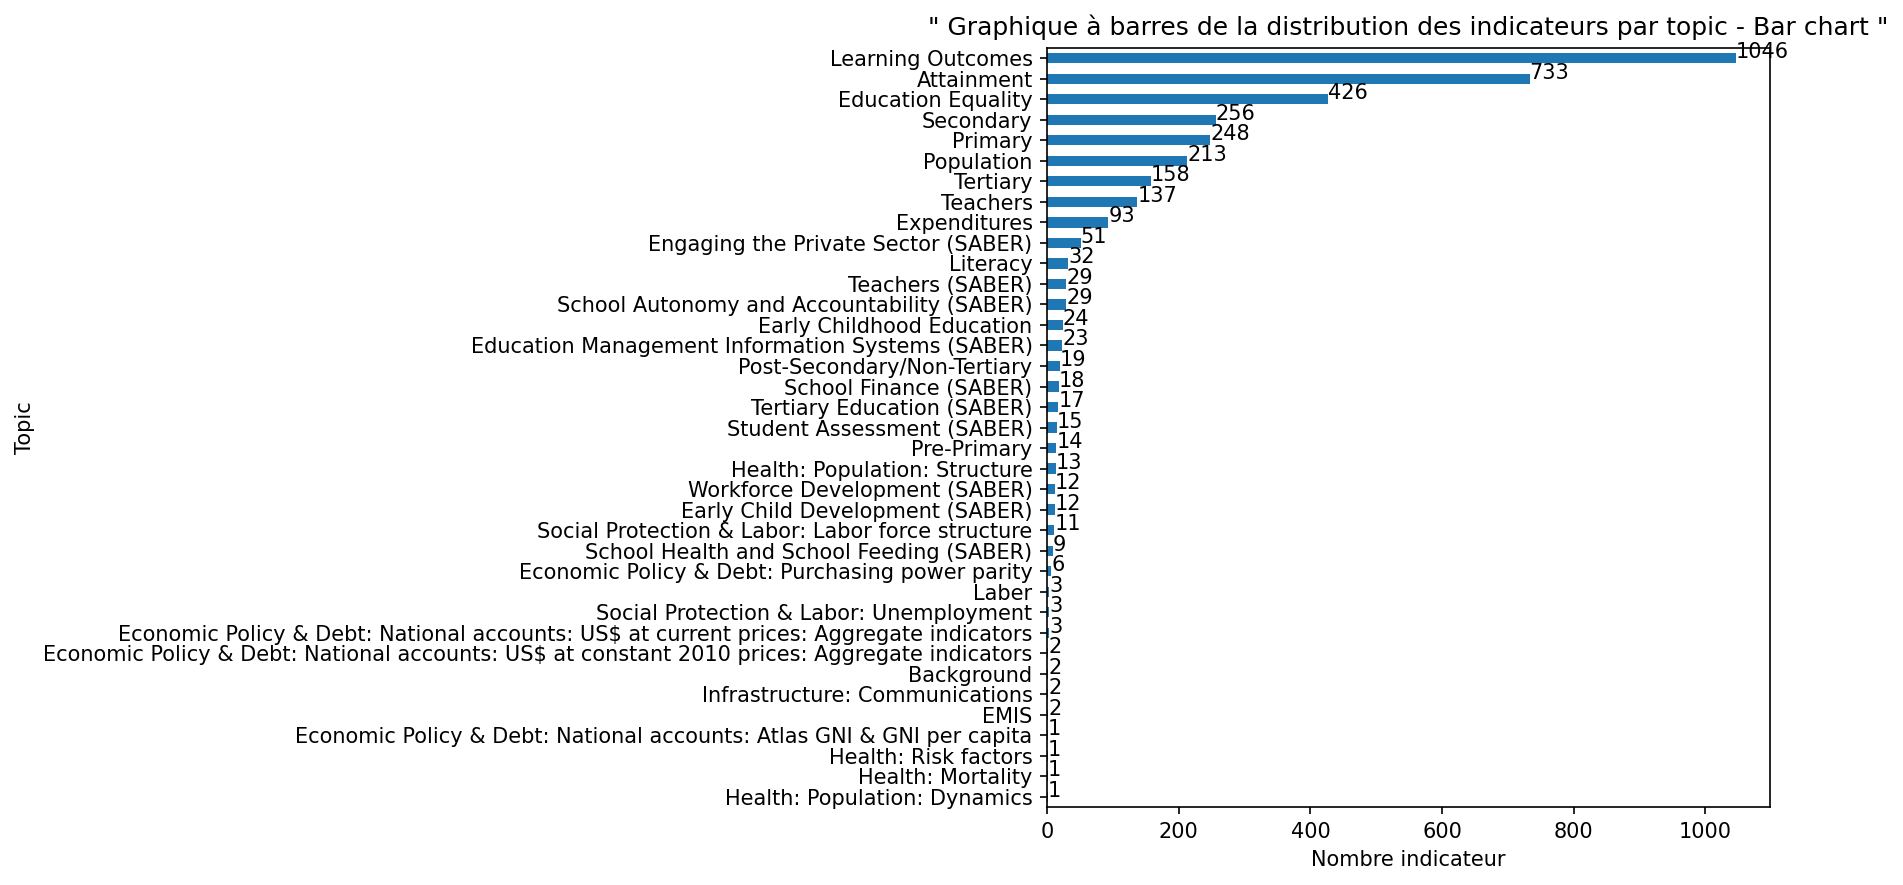

In [24]:
#Suppression des colonnes "Unnamed: 20"
#df2=df2.drop('Unnamed: 20',axis=1)

# Suppression des doublons des lignes de df2
df2=df2.drop_duplicates()
display(df2)
# resultat= pas de doublons des lignes au niveau du df2

# lister les différents topic et le nombre d'occurence par topic
topic=df2['Topic'].value_counts()
print(topic)

# Visualisation graphique 'bar chart' de la distribution des indicateurs par topic
plt.figure(figsize=(12,6), dpi=150)
topic.plot(kind='barh') #kind='barh' sert à créer un graphique à barre horizontal
plt.title('" Graphique à barres de la distribution des indicateurs par topic - Bar chart "')
plt.ylabel('Topic')
plt.xlabel('Nombre indicateur')
plt.gca().invert_yaxis()#inverser l'axe y des topic
plt.tight_layout()# tight pour optimiser la disposition de la figure

# Ajoutez les valeurs de chaque barre au-dessus
for index, value in enumerate(topic):
    plt.text(value, index, str(value))

#Etape n°3: Choix des indicateurs pertinents (12 indicateurs)

---


###Selon mon analyse du graphique ci-dessus, j'ai une vision claire sur les topics traités dans mon jeu de données ce qui va me permettre de choisir les indicateurs pertinents pour la suite du projet

##1°/ Choix indicateur 'Internet users (per 100 people)' - code indicateur 'IT.NET.USER.P2'

In [25]:
#réaliser un filtre à partir du mot clé 'internet'

filtered_df1_1 = df1[df1['Indicator Name'].str.contains('internet', case=False, na=False)]
display(filtered_df1_1)
display(filtered_df1_1['Indicator Name'].value_counts().reset_index())
#résultat= je retiens l'indicateur 'Internet users (per 100 people)'

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111325,Angola,AGO,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851655,Uruguay,URY,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855320,Uzbekistan,UZB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858985,Vanuatu,VUT,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,Indicator Name
0,Internet users (per 100 people),164


##2°/ Choix indicateur 'Personal computers (per 100 people)'- code indicateur '**IT**.CMP.PCMP.P2'

In [26]:
#réaliser un filtre à partir du mot clé 'computer'

filtered_df1_2 = df1[df1['Indicator Name'].str.contains('computer', case=False, na=False)]
display(filtered_df1_2)
display(filtered_df1_2['Indicator Name'].value_counts().reset_index())
#résultat= je retiens l'indicateur 'Personal computers (per 100 people)'

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93727,Afghanistan,AFG,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93728,Afghanistan,AFG,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93764,Afghanistan,AFG,PIAAC: Female adults by proficiency level in p...,LO.PIAAC.TEC.FE.FAILNO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93779,Afghanistan,AFG,PIAAC: Male adults by proficiency level in pro...,LO.PIAAC.TEC.MA.FAILNO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885368,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885404,Zimbabwe,ZWE,PIAAC: Female adults by proficiency level in p...,LO.PIAAC.TEC.FE.FAILNO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885419,Zimbabwe,ZWE,PIAAC: Male adults by proficiency level in pro...,LO.PIAAC.TEC.MA.FAILNO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885446,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.FAILNO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,Indicator Name
0,Personal computers (per 100 people),164
1,PIAAC: Adults by proficiency level in problem ...,164
2,PIAAC: Adults by proficiency level in problem ...,164
3,PIAAC: Female adults by proficiency level in p...,164
4,PIAAC: Male adults by proficiency level in pro...,164
5,PIAAC: Young adults by proficiency level in pr...,164
6,PIAAC: Young adults by proficiency level in pr...,164


##3°/ Choix indicateur 'Enrolment in secondary education, private institutions, both sexes (number)'

In [27]:
#réaliser un filtre à partir des mots clés 'enrolment'/ 'secondary'

filtered_df1_3 = df1[df1['Indicator Name'].str.contains('enrolment', case=False, na=False)]
filtered_df1_4 = filtered_df1_3[filtered_df1_3['Indicator Name'].str.contains('secondary', case=False, na=False)]
filtered_df1_5 = filtered_df1_4[filtered_df1_4['Indicator Name'].str.contains('female') == False]
filtered_df1_6 = filtered_df1_5[filtered_df1_5['Indicator Name'].str.contains('male') == False]
filtered_df1_7 = filtered_df1_6[filtered_df1_6['Indicator Name'].str.contains('gender') == False]
display(filtered_df1_7['Indicator Name'].value_counts().reset_index())
# je retiens l'indicateur 'Enrolment in secondary education, private institutions, both sexes (number)' car le secteur privée présente un fort potentiel pour ma start-up comparé au secteur public

,index,Indicator Name
0,"Adjusted net enrolment rate, lower secondary, ...",164
1,"Gross enrolment ratio, secondary, both sexes (%)",164
2,"Enrolment in upper secondary education, privat...",164
3,"Enrolment in upper secondary education, public...",164
4,"Enrolment in upper secondary general, both sex...",164
5,"Enrolment in upper secondary vocational, both ...",164
6,"Gross enrolment ratio, lower secondary, both s...",164
7,"Gross enrolment ratio, post-secondary non-tert...",164
8,"Gross enrolment ratio, primary and lower secon...",164
9,"Gross enrolment ratio, primary and secondary, ...",164


##4°/ Choix indicateurs 'Enrolment in tertiary education, all programmes, both sexes (number)' & 'Percentage of enrolment in tertiary education in private institutions (%)'

In [28]:
#réaliser un filtre à partir des mots clés 'enrolment' / 'tertiary'

filtered_df1_8 = filtered_df1_3[filtered_df1_3['Indicator Name'].str.contains('tertiary', case=False, na=False)]
#display(filtered_df1_8['Indicator Name'].value_counts().reset_index())
filtered_df1_9 = filtered_df1_8[filtered_df1_8['Indicator Name'].str.contains('male') == False] #je supprime les indicateurs avec les mots 'male'
display(filtered_df1_9['Indicator Name'].value_counts().reset_index())

#je retiens l'indicateur 'Enrolment in tertiary education, all programmes, both sexes (number)'
#je retiens l'indicateur 'Percentage of enrolment in tertiary education in private institutions (%)'

,index,Indicator Name
0,Enrolment in post-secondary non-tertiary educa...,164
1,"Gross enrolment ratio, post-secondary non-tert...",164
2,Percentage of enrolment in post-secondary non-...,164
3,"Gross enrolment ratio, tertiary, gender parity...",164
4,"Gross enrolment ratio, tertiary, both sexes (%)",164
5,"Gross enrolment ratio, primary to tertiary, ge...",164
6,"Gross enrolment ratio, primary to tertiary, bo...",164
7,"Gross enrolment ratio, post-secondary non-tert...",164
8,"Enrolment in tertiary education, ISCED 8 progr...",164
9,Enrolment in post-secondary non-tertiary educa...,164


##5°/ Choix indicateur 'Percentage of teachers in upper secondary education who are qualified, both sexes (%)'

In [29]:
# filtre à partir du mot clé 'teacher' niveau upper secondary
filtered_df1_10=df1[df1['Indicator Name'].str.contains('teacher', case=False, na=False)]
filtered_df1_10 = filtered_df1_10[filtered_df1_10['Indicator Name'].str.contains('female') == False]
filtered_df1_10 = filtered_df1_10[filtered_df1_10['Indicator Name'].str.contains('male') == False]
filtered_df1_10=filtered_df1_10[filtered_df1_10['Indicator Name'].str.contains('primary') == False]
display(filtered_df1_10['Indicator Name'].value_counts().reset_index())
# je retiens l'indicateur 'Percentage of teachers in upper secondary education who are qualified, both sexes (%)'

,index,Indicator Name
0,Africa Dataset: Graduates from accredited pre-...,164
1,SABER: (Teachers) Policy Goal 1: Setting clear...,164
2,SABER: (Teachers) Policy Goal 4 Lever 1: Are t...,164
3,SABER: (Teachers) Policy Goal 3: Preparing tea...,164
4,SABER: (Teachers) Policy Goal 3 Lever 2: To wh...,164
...,...,...
90,Percentage of teachers in lower secondary educ...,164
91,Percentage of teachers in lower secondary educ...,164
92,Percentage of teachers in lower secondary educ...,164
93,Annual statutory teacher salaries in public in...,164


##6°/Choix indicateurs 'Teachers in tertiary education programmes, both sexes (number)' et 'Pupil-teacher ratio in tertiary education (headcount basis)'

In [30]:
# filtre  à partir du mot clé 'teacher' niveau tertiary
filtered_df1_11=df1[df1['Indicator Name'].str.contains('teacher', case=False, na=False)]
filtered_df1_11=filtered_df1_11[filtered_df1_11['Indicator Name'].str.contains('primary') == False]
filtered_df1_11=filtered_df1_11[filtered_df1_11['Indicator Name'].str.contains('tertiary', case=False, na=False)]
display(filtered_df1_11['Indicator Name'].value_counts().reset_index())
#je retiens l'indicateur 'Teachers in tertiary education programmes, both sexes (number)'
#je retiens l'indicateur 'Pupil-teacher ratio in tertiary education (headcount basis)'
#l'indicateur 'Pupil-teacher ratio in tertiary education (headcount basis)' indique la relation entre le nombre d'étudiants et le nombre d'enseignants, Cet indicateur est important pour évaluer la qualité de l'enseignement supérieur. Un ratio élevé d'étudiants par enseignant peut indiquer un manque de ressources pédagogiques et une attention individuelle limitée pour les étudiants, ce qui peut affecter négativement la qualité de l'enseignement

,index,Indicator Name
0,Percentage of female teachers in post-secondar...,164
1,Percentage of male teachers in post-secondary ...,164
2,Percentage of teachers in post-secondary non-t...,164
3,Percentage of teachers in post-secondary non-t...,164
4,Percentage of teachers in post-secondary non-t...,164
5,Percentage of teachers in tertiary education w...,164
6,Pupil-teacher ratio in tertiary education (hea...,164
7,Teachers in post-secondary non-tertiary educat...,164
8,Teachers in post-secondary non-tertiary educat...,164
9,Teachers in tertiary education ISCED 5 program...,164


##7°/Choix indicateurs 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total' et '	Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total' et '	Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total' et '	Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total'

In [31]:
#filtre à partir du mot clé 'student'
filtered_df1_12=df1[df1['Indicator Name'].str.contains('attainment', case=False, na=False)]
filtered_df1_12=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('age', case=False, na=False)]
filtered_df1_12=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('Primary') == False]
filtered_df1_12=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('Female') == False]
filtered_df1_12=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('Male') == False]
filtered_df1_12_upper=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('upper', case=False, na=False)]
filtered_df1_12_lower=filtered_df1_12[filtered_df1_12['Indicator Name'].str.contains('lower', case=False, na=False)]
display(filtered_df1_12_upper['Indicator Name'].value_counts().reset_index())
display(filtered_df1_12_lower['Indicator Name'].value_counts().reset_index())

#je retiens les quatre indicateurs 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total'
#je retiens les quatre indicateurs 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total'
#je retiens les quatre indicateurs 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total'
#je retiens les quatre indicateurs 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total'

,index,Indicator Name
0,Wittgenstein Projection: Percentage of the pop...,164
1,Wittgenstein Projection: Percentage of the pop...,164
2,Wittgenstein Projection: Percentage of the pop...,164
3,Wittgenstein Projection: Percentage of the pop...,164
4,Wittgenstein Projection: Percentage of the pop...,164
5,Wittgenstein Projection: Percentage of the pop...,164
6,Wittgenstein Projection: Percentage of the pop...,164
7,Wittgenstein Projection: Percentage of the pop...,164
8,Wittgenstein Projection: Percentage of the pop...,164
9,Wittgenstein Projection: Percentage of the pop...,164


,index,Indicator Name
0,Wittgenstein Projection: Percentage of the pop...,164
1,Wittgenstein Projection: Percentage of the pop...,164
2,Wittgenstein Projection: Percentage of the pop...,164
3,Wittgenstein Projection: Percentage of the pop...,164
4,Wittgenstein Projection: Percentage of the pop...,164
5,Wittgenstein Projection: Percentage of the pop...,164
6,Wittgenstein Projection: Percentage of the pop...,164
7,Wittgenstein Projection: Percentage of the pop...,164
8,Wittgenstein Projection: Percentage of the pop...,164
9,Wittgenstein Projection: Percentage of the pop...,164


##8°/ Filtrer mon dataframe df1 à partir des indicateurs choisis (df1_filtre)

In [32]:
# je rassemble les 12 indicateurs choisis dans une liste
liste_indicateur=['Internet users (per 100 people)','Personal computers (per 100 people)','Enrolment in secondary education, private institutions, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)','Percentage of enrolment in tertiary education in private institutions (%)','Percentage of teachers in upper secondary education who are qualified, both sexes (%)','Teachers in tertiary education programmes, both sexes (number)','Pupil-teacher ratio in tertiary education (headcount basis)','Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total', 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total', 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total']
display(len(liste_indicateur))
display(liste_indicateur)

df1_filtre = df1[df1['Indicator Name'].isin(liste_indicateur)]# à partir de cette liste de mes indicateurs, je filtre mon dataframe df1
display(df1_filtre)

12

['Internet users (per 100 people)',
 'Personal computers (per 100 people)',
 'Enrolment in secondary education, private institutions, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Percentage of enrolment in tertiary education in private institutions (%)',
 'Percentage of teachers in upper secondary education who are qualified, both sexes (%)',
 'Teachers in tertiary education programmes, both sexes (number)',
 'Pupil-teacher ratio in tertiary education (headcount basis)',
 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total',
 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total',
 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total',
 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of e

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7732.0,9409.0,9817.0,11487.0,10956.0,12256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93706,Afghanistan,AFG,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,405.18,367.73,330.94,295.11,267.59,242.00,221.82,197.95,178.15,160.63
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,459.91,444.77,427.58,408.37,397.64,387.03,382.62,369.02,359.58,351.58
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,131.35,121.11,111.47,101.68,91.90,84.46,77.38,71.84,64.91,59.12


#Etape 4: Traitement de mon jeu de données

---


##1°/ Calcul du taux de remplissage par indicateur

In [33]:
# Calculer le 'Taux de Remplissage' pour chaque ligne et le stocker dans une nouvelle colonne 'Taux de Remplissage'
df1_filtre.loc[:, 'Taux de Remplissage'] = df1_filtre.count(axis=1) / len(df1_filtre.columns) * 100
display(df1_filtre)

<ipython-input-33-286de6044887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtre.loc[:, 'Taux de Remplissage'] = df1_filtre.count(axis=1) / len(df1_filtre.columns) * 100


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Taux de Remplissage
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.144928
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7732.0,9409.0,9817.0,11487.0,10956.0,12256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.434783
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.695652
93706,Afghanistan,AFG,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.942029
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,367.73,330.94,295.11,267.59,242.00,221.82,197.95,178.15,160.63,33.333333
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,444.77,427.58,408.37,397.64,387.03,382.62,369.02,359.58,351.58,33.333333
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,121.11,111.47,101.68,91.90,84.46,77.38,71.84,64.91,59.12,33.333333


In [34]:
# Filtrer les lignes de df1_filtre avec un taux de remplissage non nul
df1_filtre = df1_filtre.loc[df1_filtre['Taux de Remplissage'] > 0]
display(df1_filtre)
#resultat =je n'ai aucune ligne avec un taux de remplissage nul

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Taux de Remplissage
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.144928
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7732.0,9409.0,9817.0,11487.0,10956.0,12256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.434783
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.695652
93706,Afghanistan,AFG,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.942029
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,367.73,330.94,295.11,267.59,242.00,221.82,197.95,178.15,160.63,33.333333
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,444.77,427.58,408.37,397.64,387.03,382.62,369.02,359.58,351.58,33.333333
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,121.11,111.47,101.68,91.90,84.46,77.38,71.84,64.91,59.12,33.333333


### -Visualisation graphique du taux de remplissage pour chaque indicateur (Bar chart)

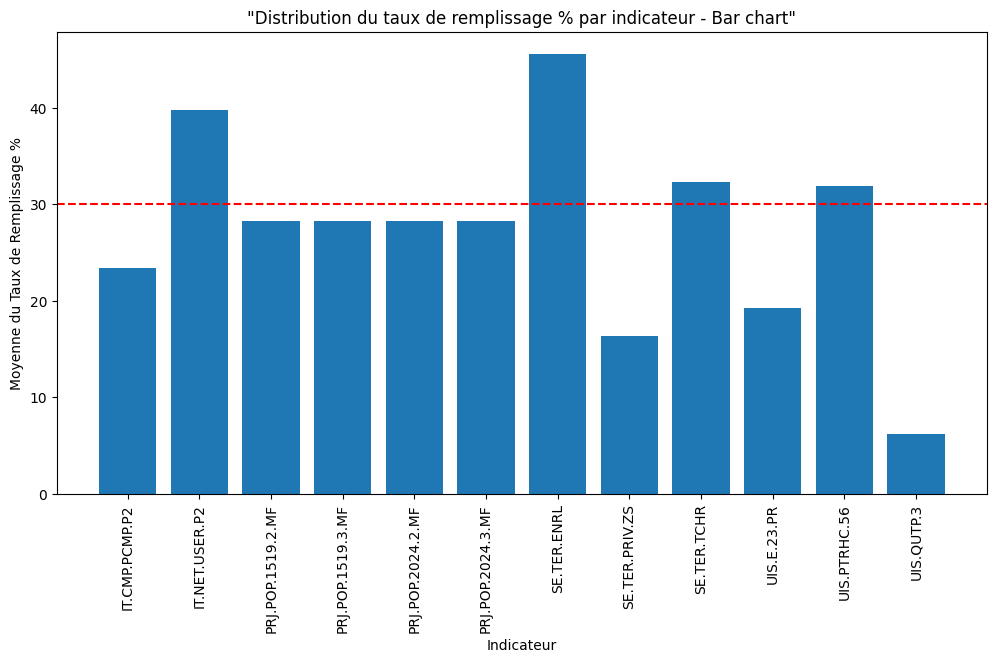

In [35]:
moyenne_par_indicateur = df1_filtre.groupby('Indicator Code')['Taux de Remplissage'].mean().reset_index() #Calcul de la moyenne des taux de remplissage par indicateur

plt.figure(figsize=(12, 6))  # Définir la taille du graphique
plt.bar(moyenne_par_indicateur['Indicator Code'], moyenne_par_indicateur['Taux de Remplissage'])
plt.axhline(y=30, color='red', linestyle='--', label='30% du taux de remplissage') #dessiner une ligne pointiée en rouge pour un taux_remplissage de 30%
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xlabel('Indicateur')
plt.ylabel('Moyenne du Taux de Remplissage %')
plt.title('"Distribution du taux de remplissage % par indicateur - Bar chart"')
plt.show()

##2°/ Filtre des années pertinentes (df1_filtre_annee)

---


###-Les années pertinentes sont représentées dans l'intervalle entre 1999 à 2015

,Année,taux de remplissage par année %
0,1970,0.044207
1,1971,0.110264
2,1972,0.103659
3,1973,0.106199
4,1974,0.108232
...,...,...
60,2080,0.272358
61,2085,0.272358
62,2090,0.272358
63,2095,0.272358


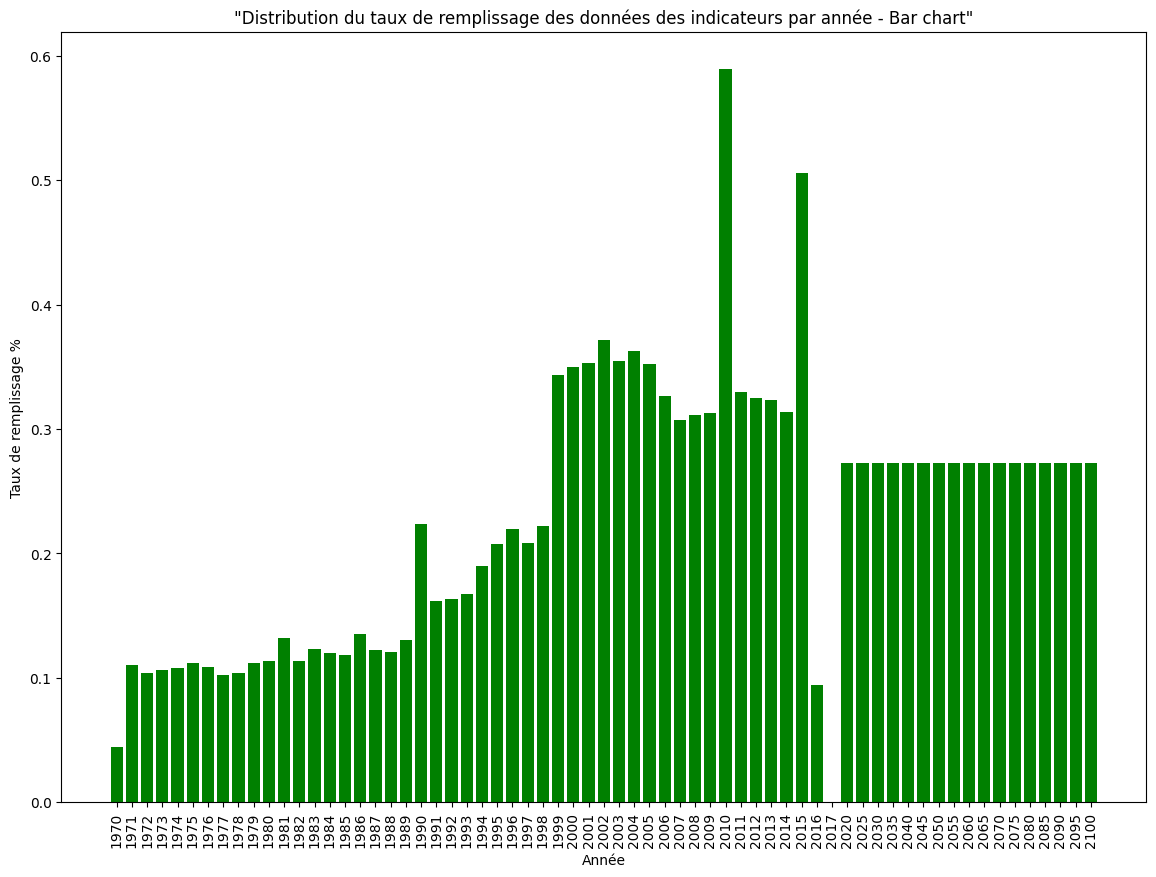

In [36]:
# visalisation graphique "Taux de remplissage par année"
#reset_index() rénitier l'index du DataFrame pour obtenir une colonne "Année" contenant les années et une colonne " Taux de remplissage par année %" contenant les pourcentages de données disponibles pour chaque année
df1_filtre_TR_annee= df1_filtre.loc[:,'1970':'2100'].notnull().mean().to_frame().reset_index() #to_frame() me permet de convertir ma série en un dataframe
df1_filtre_TR_annee=df1_filtre_TR_annee.rename(columns={'index':'Année', 0:'taux de remplissage par année %'})
display(df1_filtre_TR_annee)

plt.figure(figsize=(14, 10))
plt.bar(df1_filtre_TR_annee['Année'], df1_filtre_TR_annee['taux de remplissage par année %'], color='green')
plt.xlabel('Année')
plt.ylabel('Taux de remplissage %')
plt.title('"Distribution du taux de remplissage des données des indicateurs par année - Bar chart"')
plt.xticks(rotation=90)# Rotation des étiquettes des années à 45 degrés pour une meilleure lisibilité
plt.show()

In [37]:
#garder uniquement les colonnes avec les années pertinentes entre 1999 à 2015
colonnes_a_garder = ['Country Name','Country Code','Indicator Name', 'Indicator Code'] + [str(annee) for annee in range(1999, 2016)]
df1_filtre_annee =df1_filtre.loc[:, colonnes_a_garder]
display(df1_filtre_annee)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28132.00000,47052.000000,NaN,51469.000000,NaN
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,26211.000000,27648.000000,...,NaN,NaN,NaN,95185.00,NaN,97504.00000,NaN,NaN,262874.000000,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.004723,0.004561,0.087891,0.105809,...,2.107124,1.9,1.84,3.55,4.00,5.00000,5.454545,5.9,7.000000,8.26
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN
93706,Afghanistan,AFG,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4081.00,5433.00000,NaN,5537.0,NaN,7561.00
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,576.91,NaN,NaN,NaN,NaN,572.75
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,437.48,NaN,NaN,NaN,NaN,439.67
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,227.63,NaN,NaN,NaN,NaN,210.33


#Etape n°5 : Visualisation de la distribution des indicateurs par 'Boxplot'
## 1°/ Analyse des données manquantes NaN par calcul de moyenne de chaque indicateur pour les années comprises entre 1999 à 2015

In [38]:
# Calculez la moyenne de chaque ligne
colonnes_valeurs = df1_filtre_annee.columns[4:]
df1_filtre_annee['Moyenne'] = df1_filtre_annee[colonnes_valeurs].mean(axis=1)
#display(df1_filtre_annee)

lignes_avec_nan = df1_filtre_annee.loc[df1_filtre_annee['Moyenne'].isna()] #les lignes qui ont une valeur NaN dans la colonne 'Moyenne'
lignes_sans_nan = df1_filtre_annee.loc[~df1_filtre_annee['Moyenne'].isna()] #les lignes qui ont une valeur non NaN dans la colonne 'Moyenne'
display(lignes_avec_nan)
display(lignes_sans_nan)
df1_moy=df1_filtre_annee.dropna(subset=['Moyenne'])#contient uniquement les lignes sans NAN dans la colonne "Moyenne"

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
93706,Afghanistan,AFG,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95215,Afghanistan,AFG,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95227,Afghanistan,AFG,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95233,Afghanistan,AFG,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95245,Afghanistan,AFG,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881457,Zambia,ZMB,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881681,Zambia,ZMB,Percentage of teachers in upper secondary educ...,UIS.QUTP.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882153,Zambia,ZMB,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882578,Zambia,ZMB,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28132.00000,47052.000000,NaN,51469.000000,NaN,42217.666667
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,26211.000000,27648.000000,...,NaN,NaN,95185.00,NaN,97504.00000,NaN,NaN,262874.000000,NaN,101884.400000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.004723,0.004561,0.087891,0.105809,...,1.9,1.84,3.55,4.00,5.00000,5.454545,5.9,7.000000,8.26,3.095920
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN,21.557184
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4081.00,5433.00000,NaN,5537.0,NaN,7561.00,5653.000000
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,576.91,NaN,NaN,NaN,NaN,572.75,574.830000
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,437.48,NaN,NaN,NaN,NaN,439.67,438.575000
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,227.63,NaN,NaN,NaN,NaN,210.33,218.980000


## 2°/ Visualisation du "Nuage de points" de l'indicateur 'Enrolment in secondary education, private institutions, both sexes (number)' -- code='UIS.E.23.PR'

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28132.0,47052.0,NaN,51469.0,NaN,42217.666667
96483,Albania,ALB,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23350.0,20632.0,21866.0,23493.0,25349.0,26882.0,27560.0,NaN,23488.125000
100148,Algeria,DZA,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,5842.0,6752.0,6154.0,3561.0,12410.0,18498.0,NaN,NaN,NaN,8869.500000
107478,Andorra,AND,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,119.0,135.0,152.0,...,119.0,103.0,93.0,83.0,NaN,105.0,102.0,94.0,NaN,116.750000
111143,Angola,AGO,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70623.0,72742.0,90001.0,97167.0,NaN,NaN,NaN,NaN,82633.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840478,United Arab Emirates,ARE,"Enrolment in secondary education, private inst...",UIS.E.23.PR,61894.0,66730.0,74098.0,81312.0,104123.0,113439.0,...,151707.0,NaN,176040.0,190102.0,200450.0,216596.0,231123.0,252107.0,NaN,145105.866667
851473,Uruguay,URY,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,35899.0,37721.0,37107.0,36033.0,36968.0,...,36896.0,40119.0,41741.0,41796.0,NaN,NaN,43494.0,NaN,NaN,38393.166667
858803,Vanuatu,VUT,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,2859.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.000000
880793,Zambia,ZMB,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,9991.0,NaN,13655.0,...,NaN,34493.0,30259.0,19397.0,NaN,NaN,NaN,NaN,NaN,21559.000000


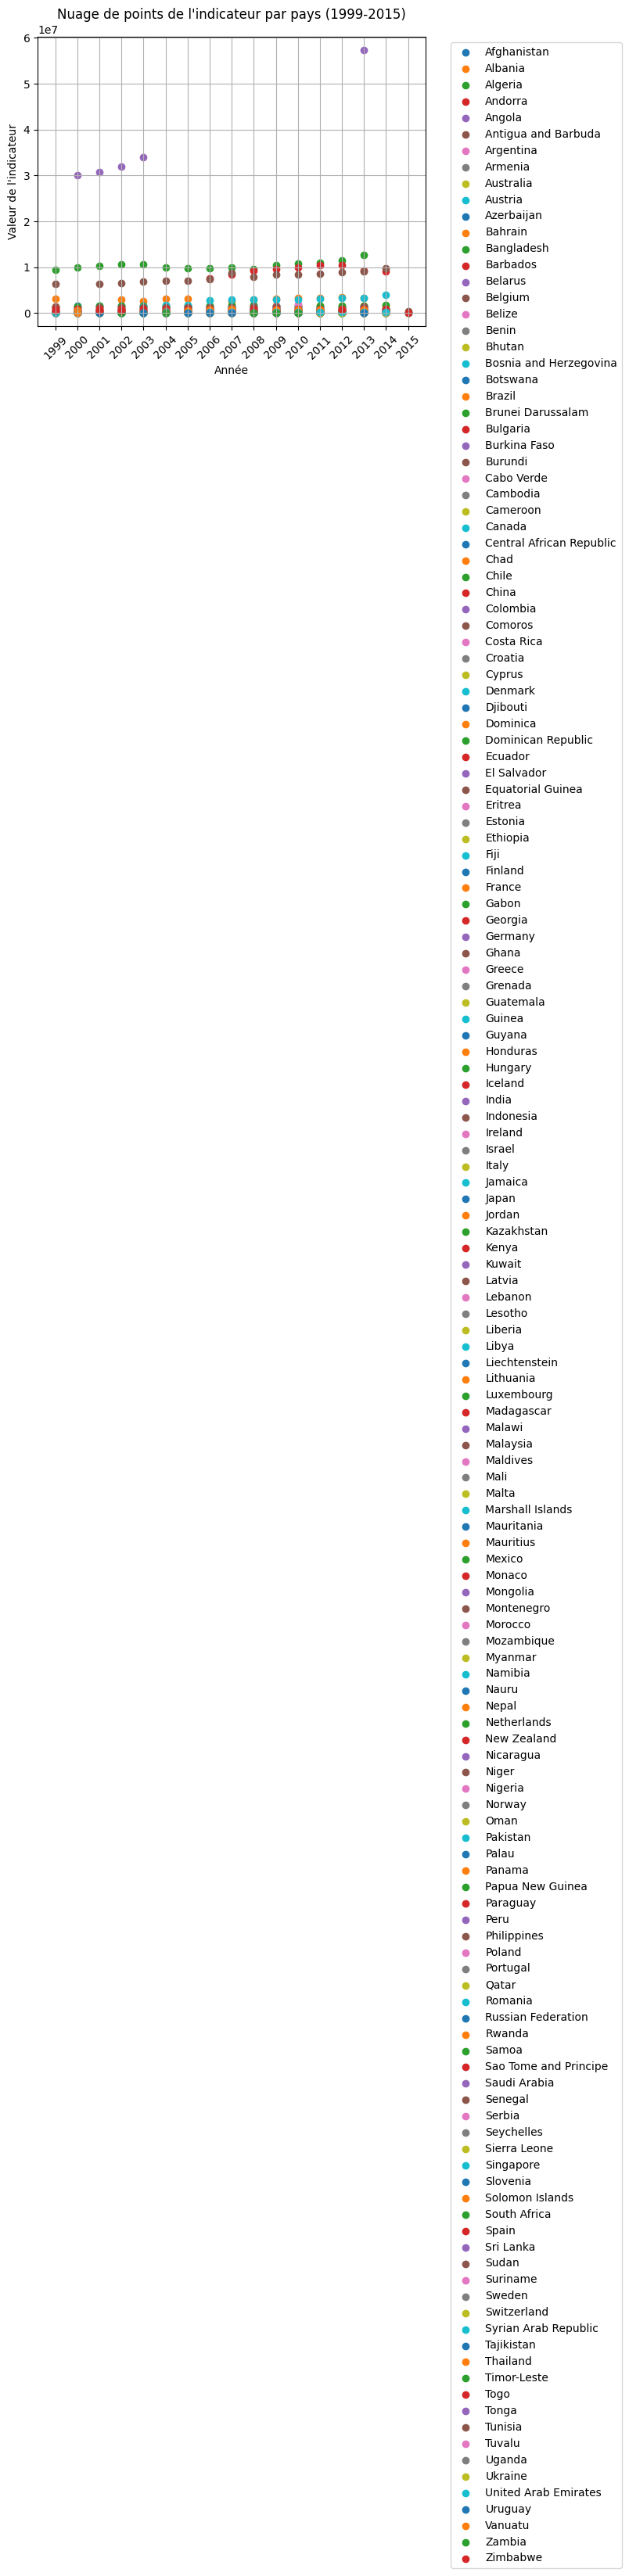

In [39]:
# Tracer le nuage des points pour l'indicateur 1
df1_moy_ind_1= df1_moy[df1_moy['Indicator Code'] == 'UIS.E.23.PR'] # je classe les pays selons l'indicateur 1 ='Enrolment in secondary education, private institutions, both sexes (number)' code='UIS.E.23.PR'
display(df1_moy_ind_1)

# Sélection des années que je souhaite inclure dans le nuage de points
annees = [str(annee) for annee in range(1999, 2016)]

# Parcourez chaque pays et tracez un nuage de points pour ses valeurs d'indicateur au fil des années
for index, row in df1_moy_ind_1.iterrows():
    pays = row['Country Name']
    valeurs_indicateur = row[annees]

    plt.scatter(annees, valeurs_indicateur, label=pays)

plt.xlabel('Année')
plt.ylabel('Valeur de l\'indicateur')
plt.title('Nuage de points de l\'indicateur par pays (1999-2015)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 3°/ Visualisation du "Boxplot" - Distribution de chaque indicateur de mon dataframe df1_moy (Boxplot)
###- Visualisation Boxplot de l'indicateur 'UIS.E.23.PR'

In [40]:
colonnes_ind= ['Country Name'] + [str(annee) for annee in range(1999, 2016)]
df1_ind1=df1_moy_ind_1[colonnes_ind]
df1_ind1 = df1_ind1.sort_values(by='2015', ascending=False)
display(df1_ind1)

#Visualiser mon Boxplot pour l'indicateur 'UIS.E.23.PR'
fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind1.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind1[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind1['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title="Boxplot de l'indicateurs UIS.E.23.PR par année et par pays"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
360363,Ghana,72976.0,101643.0,108018.0,127877.0,128615.0,NaN,194717.0,195179.0,240400.0,275313.0,NaN,NaN,330887.0,353725.0,379071.0,367611.0,419207.0
455653,Kazakhstan,14755.0,23552.0,NaN,NaN,NaN,NaN,NaN,95807.0,NaN,NaN,NaN,103948.0,95637.0,87358.0,81666.0,92797.0,93213.0
290728,Djibouti,2146.0,1434.0,2755.0,3129.0,NaN,5583.0,7031.0,5169.0,5541.0,5023.0,4919.0,NaN,5097.0,5757.0,5569.0,5192.0,5394.0
693878,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN,314.0,367.0,615.0,NaN,254.0
576598,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,134.0,NaN,130.0,NaN,NaN,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840478,United Arab Emirates,61894.0,66730.0,74098.0,81312.0,104123.0,113439.0,120629.0,136238.0,151707.0,NaN,176040.0,190102.0,200450.0,216596.0,231123.0,252107.0,NaN
851473,Uruguay,NaN,35899.0,37721.0,37107.0,36033.0,36968.0,36309.0,36635.0,36896.0,40119.0,41741.0,41796.0,NaN,NaN,43494.0,NaN,NaN
858803,Vanuatu,NaN,2859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880793,Zambia,NaN,NaN,NaN,9991.0,NaN,13655.0,NaN,NaN,NaN,34493.0,30259.0,19397.0,NaN,NaN,NaN,NaN,NaN


### -Visualisation Boxplot de l'indicateur 'SE.TER.ENRL'

In [41]:
#Visualiser mon Boxplot pour l'indicateur 2: 'Enrolment in tertiary education, all programmes, both sexes (number)' 'SE.TER.ENRL'
df1_ind_2= df1_moy[df1_moy['Indicator Code'] == 'SE.TER.ENRL']
df1_ind2=df1_ind_2[colonnes_ind]
df1_ind2 = df1_ind2.sort_values(by='2015', ascending=False)
display(df1_ind2)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind2.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind2[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind2['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title="Boxplot de l'indicateur SE.TER.ENRL par année et par pays"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
243094,China,6365625.0,7364111.0,9398581.0,12143723.0,15186217.0,18090814.0,20601220.0,23360536.0,25346280.0,26691696.0,29295840.0,31046736.0,31308378.0,32585960.0,34091288.0,41924200.0,43367392.0
415349,India,NaN,9404460.0,9834046.0,10576653.0,11295041.0,11852936.0,11777296.0,12852684.0,14862962.0,17211216.0,18500324.0,20740740.0,26650952.0,28568408.0,28175136.0,30305848.0,32107420.0
188119,Brazil,2456961.0,2781328.0,3125745.0,3582105.0,3994422.0,4275027.0,4572297.0,NaN,5272877.0,5958135.0,6115138.0,6552707.0,6929324.0,7241405.0,7541112.0,8072146.0,8285475.0
679229,Russian Federation,5751539.0,6331324.0,7167618.0,7965217.0,8592271.0,8605952.0,9003208.0,9167277.0,9370428.0,9446408.0,9330115.0,NaN,8652607.0,7983111.0,7528163.0,6995732.0,6592416.0
419014,Indonesia,3059658.0,3126307.0,3017887.0,3175833.0,3441429.0,3551092.0,3662234.0,3657429.0,3806629.0,4419577.0,4859409.0,5001048.0,5364301.0,6233984.0,6423455.0,6463297.0,5107999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811169,Trinidad and Tobago,7572.0,7737.0,8614.0,12036.0,12316.0,16751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822164,Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411.0,NaN
833159,Uganda,40591.0,55767.0,62586.0,79958.0,88330.0,88360.0,NaN,92605.0,NaN,107728.0,123887.0,120646.0,140087.0,124561.0,NaN,165396.0,NaN
858814,Vanuatu,643.0,656.0,675.0,895.0,914.0,955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur 'IT.NET.USER.P2'

In [42]:
#Visualiser mon Boxplot pour l'indicateur 3: 'Internet users (per 100 people)' 'IT.NET.USER.P2'

df1_ind_3= df1_moy[df1_moy['Indicator Code'] == 'IT.NET.USER.P2']
df1_ind3=df1_ind_3[colonnes_ind]
df1_ind3 = df1_ind3.sort_values(by='2015', ascending=False)
display(df1_ind3)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind3.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind3[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind3['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title="Boxplot de la distribution l'indicateur IT.NET.USER.P2 par pays et par année"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
411855,Iceland,41.294567,44.470534,49.392995,79.120000,83.140000,83.880000,87.000000,89.510000,90.600000,91.000000,93.000000,93.39,94.819687,96.209800,96.5468,98.16,98.200000
514475,Luxembourg,17.387958,22.887328,36.163423,39.840000,54.550000,65.880000,70.000000,72.510000,78.920000,82.230000,87.310000,90.62,90.029859,91.949924,93.7765,94.67,97.334100
107660,Andorra,7.635686,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.530000,81.00,81.000000,86.434425,94.0000,95.90,96.910000
628090,Norway,40.000000,52.000000,64.000000,72.840000,78.130000,77.690000,81.990000,82.550000,86.930000,90.570000,92.080000,93.39,93.489983,94.649978,95.0534,96.30,96.810300
507145,Liechtenstein,NaN,36.515230,45.116853,59.470711,58.809692,64.007448,63.371356,64.214161,65.080218,70.000000,75.000000,80.00,85.000000,89.407700,93.8000,95.21,96.641195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617095,Niger,0.028136,0.036261,0.105185,0.127152,0.155699,0.189934,0.221341,0.294034,0.390391,0.700000,0.760000,0.83,1.300000,1.407700,1.7000,1.95,2.476220
734375,Somalia,0.013910,0.020000,0.079039,0.115614,0.376198,1.053455,1.077328,1.100216,1.122236,1.142687,1.160611,NaN,1.250000,1.376700,1.5000,1.63,1.760000
316565,Eritrea,0.025495,0.136712,0.157815,0.227090,NaN,NaN,NaN,NaN,0.410000,0.470000,0.540000,0.61,0.700000,0.800000,0.9000,0.99,1.083733
639085,Palau,NaN,NaN,NaN,20.243939,21.601527,26.970333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur 'IT.CMP.PCMP.P2'

In [43]:
#Visualiser mon Boxplot pour l'indicateur 4: 'Personal computers (per 100 people)' 'IT.CMP.PCMP.P2'

df1_moy_ind_4= df1_moy[df1_moy['Indicator Code'] == 'IT.CMP.PCMP.P2']
df1_ind4=df1_moy_ind_4[colonnes_ind]
df1_ind4 = df1_ind4.sort_values(by='2015', ascending=False)
display(df1_ind4)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind4.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind4[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind4['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title="Boxplot de l'indicateur IT.CMP.PCMP.P2 par année et par pays"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93709,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97374,Albania,0.602783,0.756442,0.912941,1.103078,1.296542,1.492446,1.689543,3.774092,4.10584,4.593538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101039,Algeria,0.575516,0.630528,0.684288,0.742947,0.802947,0.866672,1.030597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112034,Angola,0.088819,0.107720,0.118176,0.181371,NaN,NaN,0.564518,0.646019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115699,Antigua and Barbuda,NaN,NaN,10.130173,11.245783,12.360328,13.460927,14.655120,20.966370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852364,Uruguay,9.973151,10.539499,11.121926,11.720511,12.329303,12.936914,13.533204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856029,Uzbekistan,NaN,NaN,NaN,NaN,1.598189,2.237787,2.879698,3.151018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859694,Vanuatu,1.102864,1.296891,1.373590,1.546790,1.507901,1.469616,1.432836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881684,Zambia,0.660624,0.693002,0.723789,0.752911,0.871998,1.011217,1.142108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur 'SE.TER.PRIV.ZS'

In [44]:
#Visualiser mon Boxplot pour l'indicateur 'Percentage of enrolment in tertiary education in private institutions (%)' SE.TER.PRIV.ZS

df1_moy_ind_5= df1_moy[df1_moy['Indicator Code'] == 'SE.TER.PRIV.ZS']
df1_ind5=df1_moy_ind_5[colonnes_ind]
df1_ind5 = df1_ind5.sort_values(by='2015', ascending=False)
display(df1_ind5)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind5.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind5[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind5['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title="Boxplot de la distribution de l'indicateur SE.TER.PRIV.ZS par pays et par année"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
375687,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,100.000000
507627,Liechtenstein,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000
489302,Latvia,NaN,NaN,NaN,99.211761,98.798592,97.953087,96.502838,96.091522,95.787552,95.104881,94.589180,93.777039,93.302261,92.704109,92.497414,92.251678,92.160080
320712,Estonia,NaN,NaN,83.360451,83.222862,82.789780,82.302498,82.216652,83.598389,83.761108,84.156792,84.217613,83.847214,83.201424,82.593521,83.830200,83.831131,85.476509
240082,Chile,NaN,72.440437,NaN,72.493958,74.234627,75.289032,NaN,76.108910,76.589661,77.985817,79.705856,81.922523,83.707062,84.395317,84.380379,84.468422,84.645889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767842,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.973829,NaN,NaN
800827,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.906681,NaN,NaN,NaN,NaN,NaN,NaN
808157,Tonga,67.032967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811822,Trinidad and Tobago,NaN,NaN,NaN,NaN,NaN,10.041190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur UIS.QUTP.3

In [45]:
#Visualiser mon Boxplot pour l'indicateur : 'Percentage of teachers in upper secondary education who are qualified, both sexes (%)' UIS.QUTP.3

df1_moy_ind_6= df1_moy[df1_filtre_annee['Indicator Code'] == 'UIS.QUTP.3']
df1_ind6=df1_moy_ind_6[colonnes_ind]
df1_ind6 = df1_ind6.sort_values(by='2015', ascending=False)
display(df1_ind6)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind6.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind6[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind6['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Distribution de l'indicateur UIS.QUTP.3 par année et par pays (Boxplot)"
)
fig.show()

<ipython-input-45-00ff937efc62>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
291616,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,100.00000
577486,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.12060
361251,Ghana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.52425,81.44358
97371,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.66551,98.33837,NaN
145016,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.36350,97.67394,NaN
148681,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.16114,NaN,NaN
156011,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.48049,NaN
163341,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.25632,60.89194,NaN
167006,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.86415,32.92719,NaN
196326,Brunei Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.64360,NaN


###-Visualisation Boxplot de l'indicateur SE.TER.TCHR


In [46]:
#Visualiser mon Boxplot pour l'indicateur 7: 'Teachers in tertiary education programmes, both sexes (number)' SE.TER.TCHR

df1_moy_ind_7= df1_moy[df1_filtre_annee['Indicator Code'] == 'SE.TER.TCHR']
df1_ind7=df1_moy_ind_7[colonnes_ind]
df1_ind7 = df1_ind7.sort_values(by='2015', ascending=False)
display(df1_ind7)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind7.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind7[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind7['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Distribution de l'indicateur SE.TER.TCHR par année et par pays (Boxplot)"
)
fig.show()

<ipython-input-46-3a8bc9a18589>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
417123,India,NaN,399023.0,413126.0,428646.0,428078.0,538769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.308571e+06,1.238349e+06,1.321850e+06
358483,Germany,271710.0,274210.0,272850.0,277042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697492e+05,3.846040e+05,3.962228e+05
838598,Ukraine,132929.0,145890.0,157102.0,168646.0,177644.0,187125.0,187402.0,192157.0,196887.0,200535.0,199262.0,201296.0,200831.0,197893.0,1.953910e+05,1.947750e+05,1.685860e+05
746973,Spain,107679.0,107032.0,119279.0,133546.0,136436.0,140740.0,144973.0,146229.0,144091.0,145673.0,151598.0,155239.0,153364.0,155538.0,1.513510e+05,1.539050e+05,1.570010e+05
248533,Colombia,86166.0,85743.0,88687.0,83342.0,NaN,87544.0,93673.0,87397.0,88337.0,NaN,110488.0,NaN,NaN,NaN,1.168100e+05,1.430550e+05,1.492800e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812943,Trinidad and Tobago,467.0,540.0,540.0,550.0,969.0,1720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816608,Tunisia,8261.0,9370.0,10293.0,11412.0,12937.0,14700.0,16671.0,16919.0,18117.0,18608.0,20049.0,21210.0,21552.0,22410.0,2.287750e+04,2.283000e+04,NaN
823938,Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.159000e+03,NaN
834933,Uganda,2218.0,3362.0,4062.0,3489.0,3543.0,4168.0,NaN,3927.0,NaN,3581.0,3939.0,5340.0,5724.0,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur UIS.PTRHC.56

In [47]:
#Visualiser mon Boxplot pour l'indicateur 8: 'Pupil-teacher ratio in tertiary education (headcount basis)' UIS.PTRHC.56

df1_moy_ind_8= df1_moy[df1_filtre_annee['Indicator Code'] == 'SE.TER.TCHR']
df1_ind8=df1_moy_ind_8[colonnes_ind]
df1_ind8 = df1_ind8.sort_values(by='2015', ascending=True)
display(df1_ind8)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind8.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind8[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind8['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Boxplot de la distribution de l'indicateur UIS.PTRHC.56 par pays et par année)"
)
fig.show()

<ipython-input-47-d3a59005aba2>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
710323,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,64.0,NaN,56.0,72.0
109263,Andorra,NaN,NaN,NaN,72.0,76.0,84.0,NaN,81.0,NaN,87.0,113.0,NaN,NaN,157.0,107.0,102.0,110.0
508748,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,116.0,111.0,98.0,119.0
695663,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,291.0,291.0
164238,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.0,420.0,418.0,595.0,604.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812943,Trinidad and Tobago,467.0,540.0,540.0,550.0,969.0,1720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816608,Tunisia,8261.0,9370.0,10293.0,11412.0,12937.0,14700.0,16671.0,16919.0,18117.0,18608.0,20049.0,21210.0,21552.0,22410.0,22877.5,22830.0,NaN
823938,Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8159.0,NaN
834933,Uganda,2218.0,3362.0,4062.0,3489.0,3543.0,4168.0,NaN,3927.0,NaN,3581.0,3939.0,5340.0,5724.0,NaN,NaN,NaN,NaN


###-Visualisation Boxplot de l'indicateur 'PRJ.POP.1519.2.MF'

In [48]:
#Visualiser mon Boxplot pour l'indicateur 9: 'PRJ.POP.1519.2.MF

df1_moy_ind_9= df1_moy[df1_moy['Indicator Code'] == 'PRJ.POP.1519.2.MF']
df1_ind9=df1_moy_ind_9[colonnes_ind]
df1_ind9 = df1_ind9.sort_values(by='2015', ascending=False)
display(df1_ind9)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind9.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind9[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind9['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Boxplot de la distribution de l'indicateur PRJ.POP.1519.2.MF par pays et par année"
)

fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
245480,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53593.67,NaN,NaN,NaN,NaN,44197.60
417735,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33155.21,NaN,NaN,NaN,NaN,31307.91
421400,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12515.74,NaN,NaN,NaN,NaN,12141.00
190505,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7569.77,NaN,NaN,NaN,NaN,9319.84
622975,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4905.81,NaN,NaN,NaN,NaN,6484.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861200,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39,NaN,NaN,NaN,NaN,8.83
809890,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,7.71
252810,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.06,NaN,NaN,NaN,NaN,5.55
696275,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,4.24


###-Visualisation Boxplot de l'indicateur 'PRJ.POP.1519.3.MF'

In [49]:
#Visualiser mon Boxplot pour l'indicateur 10 : 'PRJ.POP.1519.3.MF

df1_moy_ind_10= df1_moy[df1_moy['Indicator Code'] == 'PRJ.POP.1519.3.MF']
df1_ind10=df1_moy_ind_10[colonnes_ind]
df1_ind10 = df1_ind10.sort_values(by='2015', ascending=False)
display(df1_ind10)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind10.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind10[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind10['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Distribution de l'indicateur PRJ.POP.1519.3.MF par année et par pays (Boxplot)"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
417747,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42241.19,NaN,NaN,NaN,NaN,46833.13
245492,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37738.45,NaN,NaN,NaN,NaN,37976.33
637647,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4033.95,NaN,NaN,NaN,NaN,4740.42
659637,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3338.35,NaN,NaN,NaN,NaN,3820.74
421412,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263.14,NaN,NaN,NaN,NaN,3665.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809902,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,NaN,NaN,NaN,NaN,1.02
230832,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,NaN,NaN,NaN,NaN,0.66
538692,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,NaN,NaN,NaN,NaN,0.54
696287,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,0.49


###-Visualisation Boxplot de l'indicateur 'PRJ.POP.2024.2.MF'

In [50]:
#Visualiser mon Boxplot pour l'indicateur 11 : 'PRJ.POP.2024.2.MF

df1_moy_ind_11 = df1_moy[df1_moy['Indicator Code'] == 'PRJ.POP.2024.2.MF']
df1_ind11=df1_moy_ind_11[colonnes_ind]
df1_ind11 = df1_ind11.sort_values(by='2015', ascending=False)
display(df1_ind11)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind11.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind11[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind11['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))
    fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Distribution de l'indicateur PRJ.POP.2024.2.MF par année et par pays (Boxplot)"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
245498,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65450.85,NaN,NaN,NaN,NaN,49778.95
417753,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16904.09,NaN,NaN,NaN,NaN,17298.39
190523,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3989.27,NaN,NaN,NaN,NaN,3626.80
421418,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4074.39,NaN,NaN,NaN,NaN,3525.51
150208,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150.97,NaN,NaN,NaN,NaN,3490.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809908,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.51,NaN,NaN,NaN,NaN,4.44
579013,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.39,NaN,NaN,NaN,NaN,3.90
282148,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,NaN,NaN,NaN,NaN,3.36
696293,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN,2.51


###-Visualisation Boxplot de l'indicateur 'PRJ.POP.2024.3.MF'

In [51]:
#Visualiser mon Boxplot pour l'indicateur 12 : 'PRJ.POP.2024.3.MF

df1_moy_ind_12 = df1_moy[df1_moy['Indicator Code'] == 'PRJ.POP.2024.3.MF']
df1_ind12=df1_moy_ind_12[colonnes_ind]
df1_ind12 = df1_ind12.sort_values(by='2015', ascending=False)
display(df1_ind12)

fig = go.Figure()
year_min='1999'
year_max='2015'
for column in df1_ind12.loc[:, year_min : year_max]:

    fig.add_trace(go.Box(
        y=df1_ind12[column],
        name=column,
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        hovertext= df1_ind12['Country Name'] #hovertext me permet d'afficher les noms des pays au survol des points
    ))

    fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Valeur",
    title= "Distribution de l'indicateur PRJ.POP.2024.3.MF par année et par pays (Boxplot)"
)
fig.show()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
417765,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38115.11,NaN,NaN,NaN,NaN,43758.23
245510,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25013.89,NaN,NaN,NaN,NaN,24244.15
421430,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10473.81,NaN,NaN,NaN,NaN,11053.89
190535,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7821.36,NaN,NaN,NaN,NaN,8056.26
681645,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9599.38,NaN,NaN,NaN,NaN,6572.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252840,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,NaN,NaN,NaN,NaN,3.61
164880,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN,NaN,3.33
688975,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.71,NaN,NaN,NaN,NaN,3.15
809920,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.04,NaN,NaN,NaN,NaN,2.36


#Etape 6: Traitement des données de mon dataframe par normalisation
##1°/ dataframe avec des données normalisées (df1_normalized)

In [52]:
#je garde une copie de mon dataframe
df1_moy_copie = df1_moy.copy()
display(df1_moy_copie)

# Liste des colonnes des années (à partir de la cinquième colonne)
annees_columns = df1_moy_copie.columns[4:-1]
df1_normalized = df1_moy_copie.copy()# Créez un nouveau DataFrame pour stocker les valeurs normalisées
# Parcourez les colonnes des années et normalisez les valeurs pour chaque indicateur
for annee in annees_columns:
    # Normalisez les valeurs pour chaque indicateur en fonction de "Indicator Code"
    df1_normalized[annee] = df1_normalized.groupby('Indicator Code')[annee].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()) if not x.isna().all() else 0
    )
display(df1_normalized)


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28132.00000,47052.000000,NaN,51469.000000,NaN,42217.666667
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,26211.000000,27648.000000,...,NaN,NaN,95185.00,NaN,97504.00000,NaN,NaN,262874.000000,NaN,101884.400000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.004723,0.004561,0.087891,0.105809,...,1.9,1.84,3.55,4.00,5.00000,5.454545,5.9,7.000000,8.26,3.095920
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.33123,NaN,NaN,41.783138,NaN,21.557184
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4081.00,5433.00000,NaN,5537.0,NaN,7561.00,5653.000000
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,576.91,NaN,NaN,NaN,NaN,572.75,574.830000
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,437.48,NaN,NaN,NaN,NaN,439.67,438.575000
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,227.63,NaN,NaN,NaN,NaN,210.33,218.980000


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002556,0.004078,NaN,0.005248,NaN,42217.666667
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,0.001721,0.001510,...,NaN,NaN,0.003225,NaN,0.003108,NaN,NaN,0.006259,NaN,101884.400000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000069,0.000058,0.000768,0.000971,...,0.018619,0.017845,0.035891,0.040262,0.045687,0.048785,0.052276,0.061850,0.073894,3.095920
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.013312,NaN,NaN,0.417831,NaN,21.557184
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002560,0.003342,NaN,0.004151,NaN,0.005666,5653.000000
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010763,0.000000,0.000000,0.000000,0.000000,0.012956,574.830000
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010352,0.000000,0.000000,0.000000,0.000000,0.009382,438.575000
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003476,0.000000,0.000000,0.000000,0.000000,0.004223,218.980000


##2°/ Attribution de poids à mes 12 indicateurs
###-Attribution de poids selon la pertinence de chaque indicateur
###-Calcul du score pondéré pour chaque indicateur et chaque pays
###-Présenter une première liste de pays à ma start-up "Academy" en se basant sur les données de l'année 2015 (année avec le taux le plus élevé de données disponibles)

In [53]:
colonnes_2015=['Country Name','Country Code','Indicator Name','Indicator Code','2015']
weights = {
    'UIS.E.23.PR': 0.13,
    'SE.TER.ENRL': 0.05,
    'IT.NET.USER.P2': 0.2,
    'IT.CMP.PCMP.P2': 0.12,
    'SE.TER.PRIV.ZS':0.13 ,
    'UIS.QUTP.3': 0,
    'SE.TER.TCHR': 0.02,
    'UIS.PTRHC.56': -0.01,
    'PRJ.POP.1519.2.MF': 0.08,
    'PRJ.POP.1519.3.MF': 0.1,
    'PRJ.POP.2024.2.MF': 0.08,
    'PRJ.POP.2024.3.MF':0.1
}
df1_normalized_copie=df1_normalized.copy()
df1_normalized_copie=df1_normalized_copie.loc[:,colonnes_2015]

# Remplacez toutes les valeurs NaN par 0 dans le DataFrame df
df1_normalized_copie.fillna(0, inplace=True)
display(df1_normalized_copie)
# Créez une colonne 'weighted score' avec des valeurs initiales à zéro
df1_normalized_copie['weighted score'] = 0.0

# Parcourez les indicateurs et calculez le score pondéré pour chaque ligne
for indicator_code, weight in weights.items():
    # Multipliez la valeur de l'indicateur par son poids et ajoutez-la au 'weighted score'
    df1_normalized_copie['weighted score'] += df1_normalized_copie['2015'] * (df1_normalized_copie['Indicator Code'] == indicator_code) * weight
display(df1_normalized_copie)

# Utilisez groupby pour regrouper par 'Country Name' et calculez la somme de 'weighted score' pour chaque groupe
grouped = df1_normalized_copie.groupby('Country Name')['weighted score'].sum()

# Créez un nouveau DataFrame à partir du résultat groupé
nouveau_df = pd.DataFrame({'pays': grouped.index, 'score total': grouped.values})
nouveau_df = nouveau_df.sort_values(by='score total', ascending=False)

# Réinitialisez l'index du DataFrame trié
nouveau_df = nouveau_df.reset_index(drop=True)

# Affichez le DataFrame trié
print(nouveau_df.head(10))

,Country Name,Country Code,Indicator Name,Indicator Code,2015
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.000000
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,0.000000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,0.073894
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,0.000000
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.000000
...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,0.005666
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.012956
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.009382
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.004223


,Country Name,Country Code,Indicator Name,Indicator Code,2015,weighted score
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.000000,0.000000
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,0.000000,0.000000
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,0.073894,0.014779
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,0.000000,0.000000
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.000000,0.000000
...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,0.005666,0.000113
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.012956,0.001036
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.009382,0.000938
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.004223,0.000338


                   pays  score total
0                 China     0.465446
1                 India     0.464707
2         Liechtenstein     0.326452
3               Estonia     0.291238
4                Latvia     0.279861
5  United Arab Emirates     0.274567
6                Brazil     0.271491
7                Israel     0.268462
8               Belgium     0.249124
9                 Chile     0.246417


##3°/ Visualisation graphique (graphique à barres empilées) de la distribution des indicateurs pour chaque pays cibles pour l'année 2015

,Country Name,Indicator Name,2015
144128,Bahrain,"Enrolment in secondary education, private inst...",0.000000
144139,Bahrain,"Enrolment in tertiary education, all programme...",0.000885
144310,Bahrain,Internet users (per 100 people),0.951381
144792,Bahrain,Percentage of enrolment in tertiary education ...,0.355826
145016,Bahrain,Percentage of teachers in upper secondary educ...,0.000000
...,...,...,...
842263,United Arab Emirates,"Teachers in tertiary education programmes, bot...",0.006599
842875,United Arab Emirates,Wittgenstein Projection: Population age 15-19 ...,0.004701
842887,United Arab Emirates,Wittgenstein Projection: Population age 15-19 ...,0.005549
842893,United Arab Emirates,Wittgenstein Projection: Population age 20-24 ...,0.002618


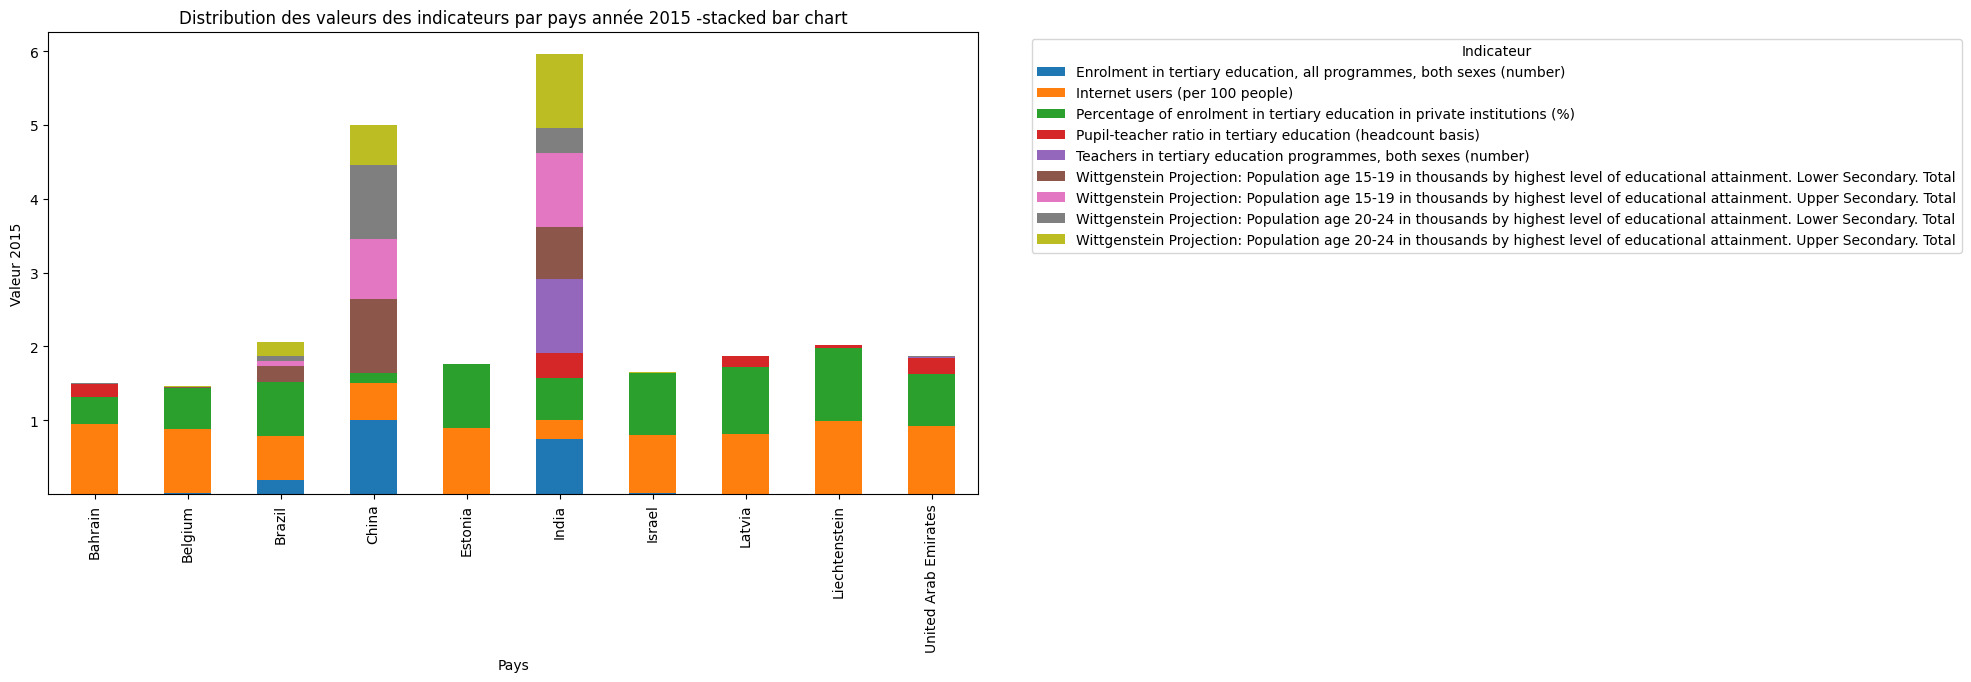

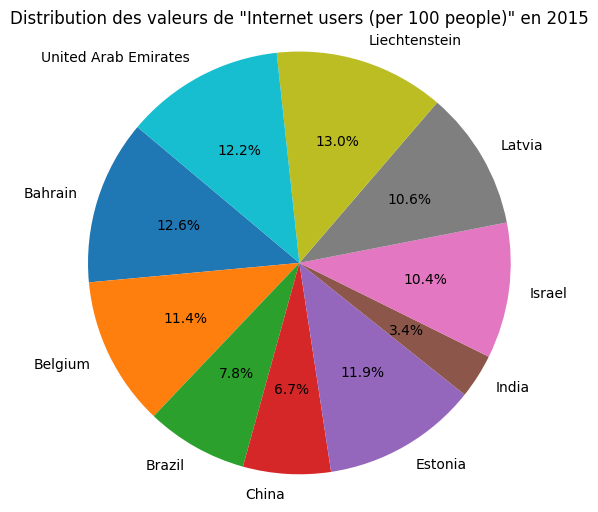

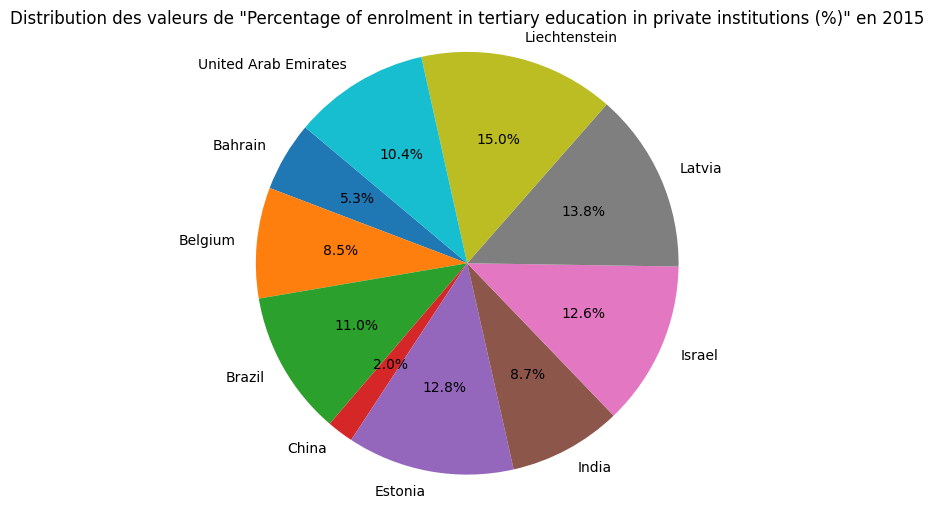

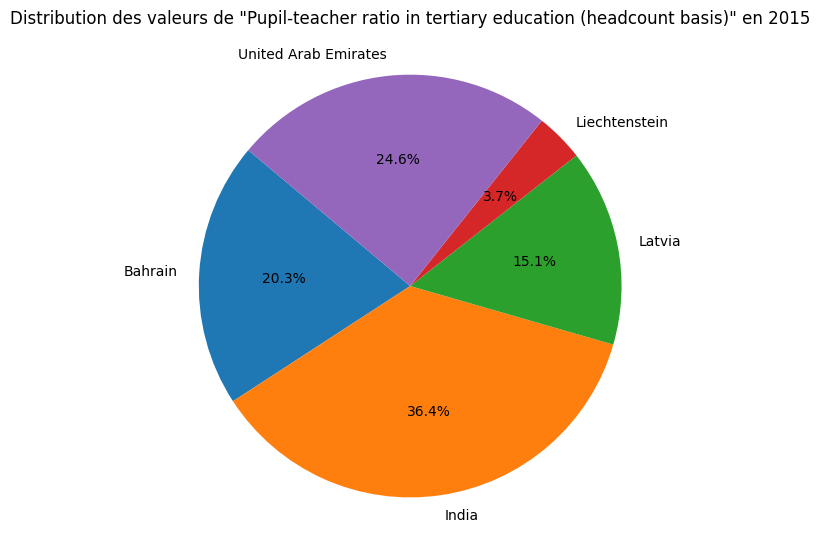

In [54]:
# Liste des pays que vous voulez conserver
pays_a_visualiser = ['China', 'India', 'Liechtenstein', 'Estonia', 'United Arab Emirates',
               'Latvia', 'Israel', 'Belgium', 'Bahrain', 'Brazil']

df1_histog = df1_normalized_copie[df1_normalized_copie['Country Name'].isin(pays_a_visualiser)]# Utilisez la méthode isin pour filtrer les lignes
df1_histog_1=df1_histog[['Country Name']+['Indicator Name']+['2015']]
display(df1_histog_1)

# Sélectionnez les données pour les pays à visualiser et l'année 2015
data_pays = df1_histog_1[(df1_histog_1['Country Name'].isin(pays_a_visualiser)) & (df1_histog_1['2015'])][['Country Name', 'Indicator Name', '2015']]

data_pays = data_pays.dropna() # Supprimez les lignes avec des valeurs NaN

data_pivot = data_pays.pivot(index='Country Name', columns='Indicator Name', values='2015')# Pivoter les données pour avoir les pays comme index, les indicateurs comme colonnes et les valeurs comme valeurs

# Créez un graphique à barres empilées
ax = data_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Pays')
plt.ylabel('Valeur 2015')
plt.title('Distribution des valeurs des indicateurs par pays année 2015 -stacked bar chart')
plt.legend(title='Indicateur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Sélectionnez les données pour l'indicateur 'Internet users (per 100 people)' de l'année 2015
indicateur = 'Internet users (per 100 people)'
data_indicateur = df1_histog_1[(df1_histog_1['Indicator Name'] == indicateur) & (df1_histog_1['2015'])]
data_indicateur = data_indicateur.dropna()# Supprimez les lignes avec des valeurs NaN

# Vérifiez s'il reste des données après la suppression des NaN
if not data_indicateur.empty:
    plt.figure(figsize=(6, 6))
    plt.pie(data_indicateur['2015'], labels=data_indicateur['Country Name'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des valeurs de "{indicateur}" en 2015')
    plt.axis('equal')  # Pour assurer que le camembert est circulaire
    plt.show()
else:
    print(f"Aucune donnée valide pour l'indicateur '{indicateur}' en 2015'.")


# Sélectionnez les données pour l'indicateur 'Percentage of enrolment in tertiary education in private institutions (%)' de l'année 2015
indicateur = 'Percentage of enrolment in tertiary education in private institutions (%)'
data_indicateur = df1_histog_1[(df1_histog_1['Indicator Name'] == indicateur) & (df1_histog_1['2015'])]
data_indicateur = data_indicateur.dropna()# Supprimez les lignes avec des valeurs NaN

# Vérifiez s'il reste des données après la suppression des NaN
if not data_indicateur.empty:
    plt.figure(figsize=(6, 6))
    plt.pie(data_indicateur['2015'], labels=data_indicateur['Country Name'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des valeurs de "{indicateur}" en 2015')
    plt.axis('equal')  # Pour assurer que le camembert est circulaire
    plt.show()
else:
    print(f"Aucune donnée valide pour l'indicateur '{indicateur}' en 2015'.")


# Sélectionnez les données pour l'indicateur 'Pupil-teacher ratio in tertiary education (headcount basis)' de l'année 2015
indicateur = 'Pupil-teacher ratio in tertiary education (headcount basis)'
data_indicateur = df1_histog_1[(df1_histog_1['Indicator Name'] == indicateur) & (df1_histog_1['2015'])]
data_indicateur = data_indicateur.dropna()# Supprimez les lignes avec des valeurs NaN

# Vérifiez s'il reste des données après la suppression des NaN
if not data_indicateur.empty:
    plt.figure(figsize=(6, 6))
    plt.pie(data_indicateur['2015'], labels=data_indicateur['Country Name'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des valeurs de "{indicateur}" en 2015', y=1.05)  # Ajustez la position du titre
    plt.axis('equal')  # Pour assurer que le camembert est circulaire
    plt.show()
else:
    print(f"Aucune donnée valide pour l'indicateur '{indicateur}' en 2015'.")

##4°/ Remplissage les données manquantes par la moyenne (df1_tendance)

In [55]:
df1_tendance=df1_normalized.copy()
#display(df1_tendance)
df1_tendance.drop('Moyenne', axis=1, inplace=True)
display(df1_tendance)
# Calculer la moyenne pour chaque ligne (axis=1)
df1_tendance['Moyenne normalisée'] = df1_tendance.iloc[:, 4:].mean(axis=1)
display(df1_tendance)

df1_tendance.reset_index(drop=True, inplace=True)# Réinitialisez l'index du DataFrame
display(df1_tendance)

# Fonction pour remplir les NaN de chaque ligne avec la moyenne de cette ligne
def fill_nan_with_mean(row):
    mean = row.mean()
    return row.fillna(mean)

# Appliquer la fonction à chaque ligne du DataFrame
df1_tendance.iloc[:, 4:] = df1_tendance.iloc[:, 4:].apply(fill_nan_with_mean, axis=1)
display(df1_tendance)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002556,0.004078,NaN,0.005248,NaN
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,0.001721,0.001510,...,NaN,NaN,NaN,0.003225,NaN,0.003108,NaN,NaN,0.006259,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000069,0.000058,0.000768,0.000971,...,0.021551,0.018619,0.017845,0.035891,0.040262,0.045687,0.048785,0.052276,0.061850,0.073894
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.013312,NaN,NaN,0.417831,NaN
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001065,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002560,0.003342,NaN,0.004151,NaN,0.005666
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010763,0.000000,0.000000,0.000000,0.000000,0.012956
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010352,0.000000,0.000000,0.000000,0.000000,0.009382
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003476,0.000000,0.000000,0.000000,0.000000,0.004223


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne normalisée
92818,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002556,0.004078,NaN,0.005248,NaN,0.003961
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,0.001721,0.001510,...,NaN,NaN,0.003225,NaN,0.003108,NaN,NaN,0.006259,NaN,0.003165
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000069,0.000058,0.000768,0.000971,...,0.018619,0.017845,0.035891,0.040262,0.045687,0.048785,0.052276,0.061850,0.073894,0.028790
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.013312,NaN,NaN,0.417831,NaN,0.215572
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886243,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002560,0.003342,NaN,0.004151,NaN,0.005666,0.003930
886855,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010763,0.000000,0.000000,0.000000,0.000000,0.012956,0.001395
886867,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010352,0.000000,0.000000,0.000000,0.000000,0.009382,0.001161
886873,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003476,0.000000,0.000000,0.000000,0.000000,0.004223,0.000453


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne normalisée
0,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002556,0.004078,NaN,0.005248,NaN,0.003961
1,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,0.001721,0.001510,...,NaN,NaN,0.003225,NaN,0.003108,NaN,NaN,0.006259,NaN,0.003165
2,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000069,0.000058,0.000768,0.000971,...,0.018619,0.017845,0.035891,0.040262,0.045687,0.048785,0.052276,0.061850,0.073894,0.028790
3,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.013312,NaN,NaN,0.417831,NaN,0.215572
4,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002560,0.003342,NaN,0.004151,NaN,0.005666,0.003930
1609,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010763,0.000000,0.000000,0.000000,0.000000,0.012956,0.001395
1610,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010352,0.000000,0.000000,0.000000,0.000000,0.009382,0.001161
1611,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003476,0.000000,0.000000,0.000000,0.000000,0.004223,0.000453


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne normalisée
0,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,...,0.003961,0.003961,0.003961,0.003961,0.002556,0.004078,0.003961,0.005248,0.003961,0.003961
1,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,0.003165,0.003165,0.003165,0.003165,0.001721,0.001510,...,0.003165,0.003165,0.003225,0.003165,0.003108,0.003165,0.003165,0.006259,0.003165,0.003165
2,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,0.028790,0.028790,0.000069,0.000058,0.000768,0.000971,...,0.018619,0.017845,0.035891,0.040262,0.045687,0.048785,0.052276,0.061850,0.073894,0.028790
3,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,0.215572,0.215572,0.215572,0.215572,0.215572,0.215572,...,0.215572,0.215572,0.215572,0.215572,0.013312,0.215572,0.215572,0.417831,0.215572,0.215572
4,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,...,0.000513,0.000513,0.000513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,0.003930,0.003930,0.003930,0.003930,0.003930,0.003930,...,0.003930,0.003930,0.003930,0.002560,0.003342,0.003930,0.004151,0.003930,0.005666,0.003930
1609,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010763,0.000000,0.000000,0.000000,0.000000,0.012956,0.001395
1610,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010352,0.000000,0.000000,0.000000,0.000000,0.009382,0.001161
1611,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003476,0.000000,0.000000,0.000000,0.000000,0.004223,0.000453


##5°/ Calcul des nouveaux indicateurs de tendance pour les années pertinentes

In [56]:
colonnes_supprimer= ['Dérivée Discrète 2005','Vitesse d\'évolution 2005','Dérivée Discrète 2010','Vitesse d\'évolution 2010','Dérivée Discrète 2015','Vitesse d\'évolution 2015']
#df1_tendance=df1_tendance.drop(columns=colonnes_supprimer, inplace=True)

# Créez une nouvelle colonne pour la dérivée entre 2005 et 2010
df1_tendance['Derivee_2005_2010'] = (df1_tendance['2010'] - df1_tendance['2005']) / 5

# Créez une nouvelle colonne pour la dérivée entre 2005 et 2015
df1_tendance['Derivee_2005_2015'] = (df1_tendance['2015'] - df1_tendance['2005']) / 10

# Créez une nouvelle colonne pour la vitesse d'évolution entre 2005 et 2010
df1_tendance['Vitesse_2005_2010'] = df1_tendance['Derivee_2005_2010'] / df1_tendance['2005']

# Créez une nouvelle colonne pour la vitesse d'évolution entre 2005 et 2015
df1_tendance['Vitesse_2005_2015'] = df1_tendance['Derivee_2005_2015'] / df1_tendance['2005']

display(df1_tendance)


,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,Moyenne normalisée,Derivee_2005_2010,Derivee_2005_2015,Vitesse_2005_2010,Vitesse_2005_2015
0,Afghanistan,AFG,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,...,0.002556,0.004078,0.003961,0.005248,0.003961,0.003961,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,0.003165,0.003165,0.003165,0.003165,0.001721,0.001510,...,0.003108,0.003165,0.003165,0.006259,0.003165,0.003165,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,0.028790,0.028790,0.000069,0.000058,0.000768,0.000971,...,0.045687,0.048785,0.052276,0.061850,0.073894,0.028790,0.005386,0.006056,0.404045,0.454307
3,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,0.215572,0.215572,0.215572,0.215572,0.215572,0.215572,...,0.013312,0.215572,0.215572,0.417831,0.215572,0.215572,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000513,-0.000607,-0.000304,-0.200000,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,Zimbabwe,ZWE,"Teachers in tertiary education programmes, bot...",SE.TER.TCHR,0.003930,0.003930,0.003930,0.003930,0.003930,0.003930,...,0.003342,0.003930,0.004151,0.003930,0.005666,0.003930,-0.000274,0.000174,-0.069701,0.044172
1609,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012956,0.001395,0.002153,0.001296,inf,inf
1610,Zimbabwe,ZWE,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009382,0.001161,0.002070,0.000938,inf,inf
1611,Zimbabwe,ZWE,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004223,0.000453,0.000695,0.000422,inf,inf


In [57]:
# Seuil pour la dérivée discrète
seuil = 0.05  # Par exemple, 5% de changement

# Liste des colonnes des dérivées discrètes et des vitesses d'évolution
colonnes_dérivée_2010 = ['Derivee_2005_2010', 'Vitesse_2005_2010']
colonnes_dérivée_2015 = ['Derivee_2005_2015', 'Vitesse_2005_2015']

# Condition pour garder les lignes avec des changements significatifs (positifs)
condition_2010 = (df1_tendance[colonnes_dérivée_2010[0]] >= seuil) | (df1_tendance[colonnes_dérivée_2010[1]] >= seuil)
condition_2015 = (df1_tendance[colonnes_dérivée_2015[0]] >= seuil) | (df1_tendance[colonnes_dérivée_2015[1]] >= seuil)

# Appliquer la condition pour filtrer le DataFrame
df = df1_tendance[condition_2010 & condition_2015]
df = df.sort_values(by='Derivee_2005_2015', ascending=False)
display (df)

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,Moyenne normalisée,Derivee_2005_2010,Derivee_2005_2015,Vitesse_2005_2010,Vitesse_2005_2015
678,India,IND,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.176471e-01,2.000000e-01,1.000000e-01,inf,inf
351,China,CHN,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.176471e-01,2.000000e-01,1.000000e-01,inf,inf
680,India,IND,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.176471e-01,2.000000e-01,1.000000e-01,inf,inf
349,China,CHN,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.176471e-01,2.000000e-01,1.000000e-01,inf,inf
569,Ghana,GHA,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.007674,0.003369,0.003498,0.003992,0.003784,0.087154,...,0.030226,0.030719,0.006613,0.037531,1.000000,8.715397e-02,1.342031e-02,9.799476e-02,0.669261,4.88693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Tonga,TON,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000010,1.176005e-06,1.941572e-06,1.028423e-06,inf,inf
317,Central African Republic,CAF,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000008,9.076230e-07,1.420421e-06,8.327486e-07,inf,inf
917,Maldives,MDV,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000006,8.822305e-07,1.846547e-06,5.765183e-07,inf,inf
1286,Sao Tome and Principe,STP,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000005,5.687664e-07,9.942946e-07,4.697556e-07,inf,inf


##6°/ Liste des pays potentiels pour la start-up "Academy"

In [58]:
# Sélectionnez les colonnes spécifiques
colonnes_selectionnees = ['Country Name', 'Indicator Name', 'Indicator Code', '2005', '2010', '2015']
nv_df=df.loc[:, colonnes_selectionnees]

nv_df['Poids Indicateur'] = nv_df['Indicator Code'].map(weights)# Créez une colonne "Poids Indicateur" dans votre DataFrame nouveau_df en utilisant map
index_indicator_code = nv_df.columns.get_loc("Indicator Code")# Obtenez l'index de la colonne "Indicator Code"
nv_df.insert(index_indicator_code + 1, "Poids Indicateur", nv_df.pop("Poids Indicateur"))# Insérez la colonne "Poids Indicateur" juste après la colonne "Indicator Code"

#Calcul du score pour chaque année
annees = ['2005', '2010', '2015']# Liste des années pour lesquelles vous voulez calculer les scores
for annee in annees:
    # Créer une fonction pour calculer le score
    def calculate_score(row):
        return row[annee] * row['Poids Indicateur']
    nv_df[f'Score {annee}'] = nv_df.apply(calculate_score, axis=1)# Appliquer la fonction pour créer la colonne de score pour l'année donnée
display(nv_df)

#Classement des pays
grouped = nv_df.groupby('Country Name')# Regrouper les données par 'Country Name'

total_score_2005 = grouped['Score 2005'].sum()# Calculer la somme des scores pour chaque année
total_score_2010 = grouped['Score 2010'].sum()
total_score_2015 = grouped['Score 2015'].sum()

# Créer un nouveau DataFrame avec les totaux
total_scores_df = pd.DataFrame({
    'Country Name': total_score_2005.index,
    'Total Score 2005': total_score_2005.values,
    'Total Score 2010': total_score_2010.values,
    'Total Score 2015': total_score_2015.values
})


# Classer le DataFrame par ordre décroissant des valeurs de Total Score 2015
df_pays_2015 = total_scores_df.sort_values(by='Total Score 2015', ascending=False)
display(df_pays_2015.head(15))

# Classer le DataFrame par ordre décroissant des valeurs de Total Score 2010
df_pays_2010 = total_scores_df.sort_values(by='Total Score 2010', ascending=False)
#display(df_pays_2010.head(15))

# Classer le DataFrame par ordre décroissant des valeurs de Total Score 2005
df_pays_2005 = total_scores_df.sort_values(by='Total Score 2005', ascending=False)
#display(df_pays_2005.head(15))

# Calcul de la dérivée discrète entre 2005 et 2010
total_scores_df['Dérivée Discrète 2005-2010'] = (total_scores_df['Total Score 2010'] - total_scores_df['Total Score 2005']) / 5

# Calcul de la vitesse d'évolution entre 2005 et 2010
total_scores_df['Vitesse d\'évolution 2005-2010'] = (total_scores_df['Total Score 2010'] - total_scores_df['Total Score 2005']) / total_scores_df['Total Score 2005']

# Calcul de la dérivée discrète entre 2005 et 2015
total_scores_df['Dérivée Discrète 2005-2015'] = (total_scores_df['Total Score 2015'] - total_scores_df['Total Score 2005']) / 10

# Calcul de la vitesse d'évolution entre 2005 et 2015
total_scores_df['Vitesse d\'évolution 2005-2015'] = (total_scores_df['Total Score 2015'] - total_scores_df['Total Score 2005']) / total_scores_df['Total Score 2005']
display(total_scores_df)
# Classer le DataFrame par ordre décroissant des valeurs de Dérivée Discrète 2005-2015
total_score_df = total_scores_df.sort_values(by='Dérivée Discrète 2005-2015', ascending=False)
display(total_score_df.head(20))

,Country Name,Indicator Name,Indicator Code,Poids Indicateur,2005,2010,2015,Score 2005,Score 2010,Score 2015
678,India,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.10,0.000000,1.000000,1.000000,0.000000,1.000000e-01,1.000000e-01
351,China,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.2.MF,0.08,0.000000,1.000000,1.000000,0.000000,8.000000e-02,8.000000e-02
680,India,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,0.10,0.000000,1.000000,1.000000,0.000000,1.000000e-01,1.000000e-01
349,China,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.2.MF,0.08,0.000000,1.000000,1.000000,0.000000,8.000000e-02,8.000000e-02
569,Ghana,"Enrolment in secondary education, private inst...",UIS.E.23.PR,0.13,0.020052,0.087154,1.000000,0.002607,1.133002e-02,1.300000e-01
...,...,...,...,...,...,...,...,...,...,...
1500,Tonga,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,0.10,0.000000,0.000010,0.000010,0.000000,9.707862e-07,1.028423e-06
317,Central African Republic,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.10,0.000000,0.000007,0.000008,0.000000,7.102105e-07,8.327486e-07
917,Maldives,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.10,0.000000,0.000009,0.000006,0.000000,9.232736e-07,5.765183e-07
1286,Sao Tome and Principe,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,0.10,0.000000,0.000005,0.000005,0.000000,4.971473e-07,4.697556e-07


,Country Name,Total Score 2005,Total Score 2010,Total Score 2015
32,China,0.019458,0.388082,0.397847
62,India,0.005344,0.285721,0.335781
53,Ghana,0.006959,0.032474,0.198466
3,Andorra,0.086365,0.173395,0.197343
116,Russian Federation,0.043780,0.147151,0.190988
11,Bahrain,0.048861,0.117862,0.190586
114,Qatar,0.056759,0.147870,0.189290
147,United Arab Emirates,0.091873,0.147411,0.186031
49,France,0.098476,0.177512,0.183996
20,Brazil,0.048214,0.130100,0.165866


,Country Name,Total Score 2005,Total Score 2010,Total Score 2015,Dérivée Discrète 2005-2010,Vitesse d'évolution 2005-2010,Dérivée Discrète 2005-2015,Vitesse d'évolution 2005-2015
0,Afghanistan,0.002666,0.008052,0.014779,0.001077,2.020223,0.001211,4.543074
1,Albania,0.014409,0.121889,0.148495,0.021496,7.459271,0.013409,9.305724
2,Algeria,0.013697,0.036849,0.086771,0.004630,1.690309,0.007307,5.334975
3,Andorra,0.086365,0.173395,0.197343,0.017406,1.007703,0.011098,1.284997
4,Angola,0.002596,0.005631,0.023559,0.000607,1.168561,0.002096,8.073547
...,...,...,...,...,...,...,...,...
148,Uruguay,0.046232,0.099864,0.131724,0.010726,1.160053,0.008549,1.849172
149,Uzbekistan,0.007542,0.033605,0.085910,0.005213,3.455811,0.007837,10.391006
150,Vanuatu,0.011542,0.016669,0.043837,0.001025,0.444179,0.003229,2.797969
151,Zambia,0.006411,0.022490,0.043122,0.003216,2.508263,0.003671,5.726621


,Country Name,Total Score 2005,Total Score 2010,Total Score 2015,Dérivée Discrète 2005-2010,Vitesse d'évolution 2005-2010,Dérivée Discrète 2005-2015,Vitesse d'évolution 2005-2015
32,China,0.019458,0.388082,0.397847,0.073725,18.944270,0.037839,19.446105
62,India,0.005344,0.285721,0.335781,0.056075,52.467110,0.033044,61.834981
53,Ghana,0.006959,0.032474,0.198466,0.005103,3.666618,0.019151,27.519829
116,Russian Federation,0.043780,0.147151,0.190988,0.020674,2.361130,0.014721,3.362447
71,Kazakhstan,0.006664,0.072128,0.151689,0.013093,9.824237,0.014503,21.763994
11,Bahrain,0.048861,0.117862,0.190586,0.013800,1.412204,0.014172,2.900588
10,Azerbaijan,0.018324,0.101436,0.158742,0.016622,4.535565,0.014042,7.662885
1,Albania,0.014409,0.121889,0.148495,0.021496,7.459271,0.013409,9.305724
114,Qatar,0.056759,0.147870,0.189290,0.018222,1.605205,0.013253,2.334964
76,Lebanon,0.023178,0.094192,0.151117,0.014203,3.063915,0.012794,5.519908


<Figure size 2000x1000 with 0 Axes>

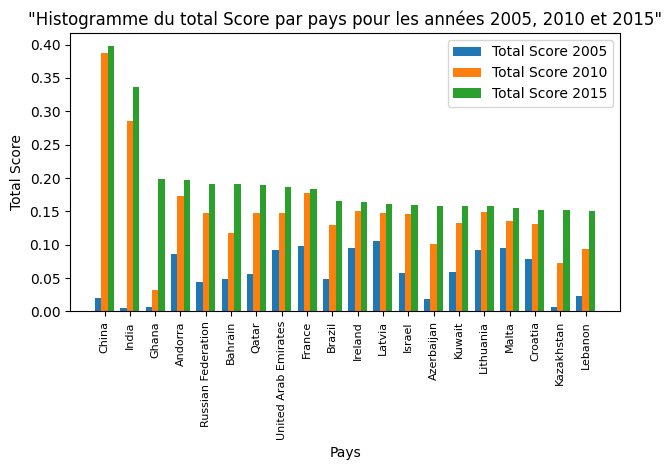

In [59]:
# Graphique à barres empilés pour les 20 premiers pays
top_20_pays = df_pays_2015.iloc[:20]
pays = top_20_pays['Country Name']
scores_2005 = top_20_pays['Total Score 2005']
scores_2010 = top_20_pays['Total Score 2010']
scores_2015 = top_20_pays['Total Score 2015']

# Spécifier la taille de la figure
plt.figure(figsize=(20, 10))  # Ajustez les dimensions

# Créer un tableau d'indices pour l'axe x
indices = np.arange(len(pays))
largeur_barres = 0.25# Largeur des barres

# Créer la figure et les sous-graphiques
fig, ax = plt.subplots()

# Créer les barres pour chaque année
barres_2005 = ax.bar(indices, scores_2005, largeur_barres, label='Total Score 2005')
barres_2010 = ax.bar(indices + largeur_barres, scores_2010, largeur_barres, label='Total Score 2010')
barres_2015 = ax.bar(indices + 2 * largeur_barres, scores_2015, largeur_barres, label='Total Score 2015')

ax.set_xlabel('Pays')
ax.set_xticks(indices + largeur_barres)
ax.set_xticklabels(pays, rotation=90, fontsize=8) # Étiqueter les pays sur l'axe x avec une rotation de 90 degrés pour éviter le chevauchement
ax.set_ylabel('Total Score')
ax.legend()# Légende
plt.title('"Histogramme du total Score par pays pour les années 2005, 2010 et 2015"')
plt.tight_layout()
plt.show()

#Conclusion
## les données du système éducatif international de la banque mondiale sont de qualité et très pertinents vis à vis la prise de décision du projet de l'expansion à l'internationale pour la start-up Academy.